In [1]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
#Reading the Data

Dataset_encoding = 'ISO-8859-1'
df = pd.read_csv('twitter_new.csv',encoding = Dataset_encoding)
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
#Creating Column Names

df.columns = ['target','ids','date','flag','user','text']

In [5]:
#Checking the counts of Target values

plt.figure(figsize =(15,10))
df['target'].value_counts()           #shows the values of target variables

4    800000
0    799999
Name: target, dtype: int64

<Figure size 1080x720 with 0 Axes>

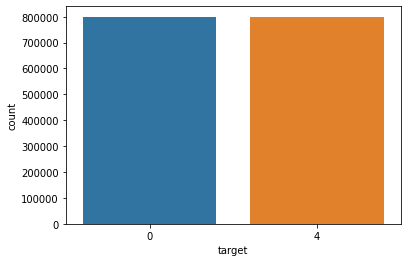

In [6]:
sns.countplot(x='target', data=df)

In [7]:
# Removing the Links,Special characters and names

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning = "@\S+|https?:\S+Ihttp?:\SI[^A-Za-z0-9]+"
def preprocess(text, stem=False):
  text = re.sub(text_cleaning,' ',str(text).lower()).strip()
  tokens =[]
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)
df['text'] = df['text'].apply(lambda x: preprocess(x))

In [8]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = TfidfVectorizer(stop_words='english',ngram_range = (1,3),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['text'])

In [9]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))
df['text'].head()

#lem = WordNetLemmatizer()
#df['tokens'] = df['tokens'].apply(lambda x: [lem.lemmatize(word) for word in x])


0    upset can't update facebook texting it... migh...
1    dived many times ball. managed save 50% rest g...
2                     whole body feels itchy like fire
3    no, behaving all. i'm mad. here? can't see there.
4                                           whole crew
Name: text, dtype: object

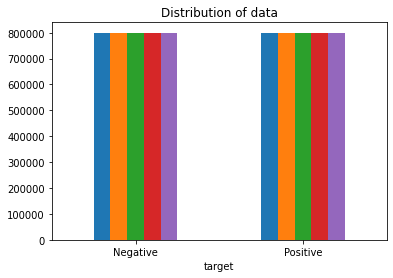

In [10]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

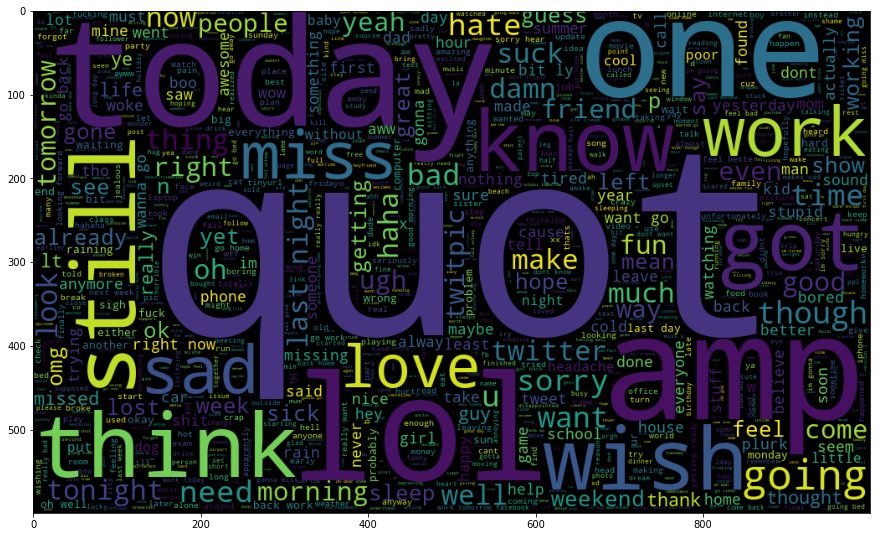

In [11]:
data_neg = df['text'][:800000]
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 1000 , width = 1000 , height = 600).generate(" ".join(data_neg))
plt.imshow(wc)

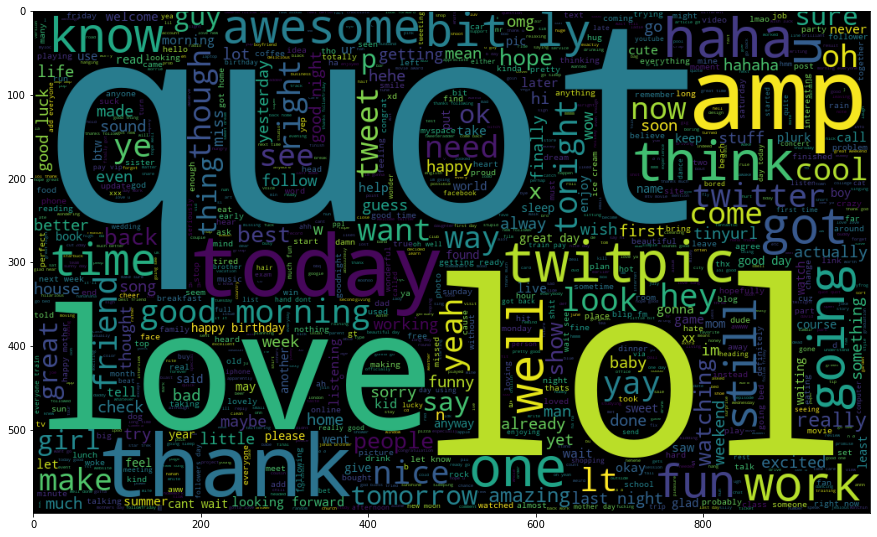

In [12]:
data_pos = df['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1000 , height = 600).generate(" ".join(data_pos))
plt.figure(figsize = (15,15))
plt.imshow(wc)

In [13]:
# Splitting the data into Training and Testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(text_counts, df['target'], test_size=0.25, random_state=5)

In [14]:
# Training with Different Models to get the Best Model

from sklearn.naive_bayes import MultinomialNB
model_1 = MultinomialNB()
model_1.fit(x_train,y_train)

MultinomialNB()

In [15]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
model_2.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# Calculating the Score of the Model

from sklearn import metrics
preds_1 = model_1.predict(x_test)
accuracy_score = metrics.accuracy_score(preds_1,y_test)
print('Accuracy Score for Naive Bayes Model is :',accuracy_score)

Accuracy Score for Naive Bayes Model is : 0.7733225


In [17]:
preds_2 = model_2.predict(x_test)
Accuracy_score = metrics.accuracy_score(preds_2,y_test)
print('Accuracy Score for Logistic Regression Model is:',Accuracy_score)

Accuracy Score for Logistic Regression Model is: 0.781995


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


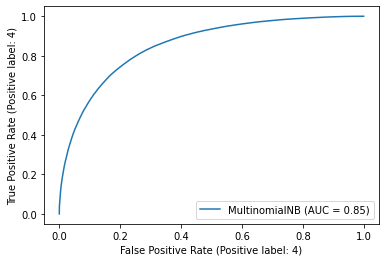

In [21]:
from sklearn.metrics import confusion_matrix , roc_curve , auc, plot_roc_curve

#For Model 1 i.e Naive Bayes

confusion_matrix(preds_1,y_test)
plot_roc_curve(model_1,x_test,y_test)

Text(0.5, 1.0, 'Confusion Matrix')

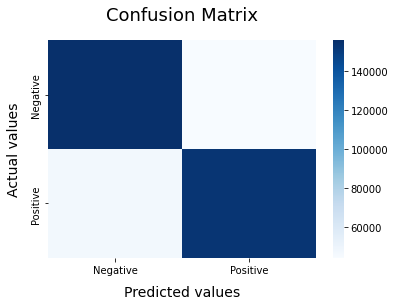

In [22]:
cf_matrix = confusion_matrix(y_test, preds_1)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
sns.heatmap(cf_matrix, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


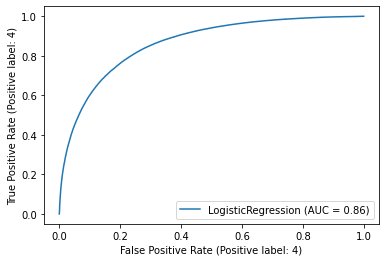

In [19]:
#For Model 2 i.e Logistic Regression

confusion_matrix(preds_2,y_test)
plot_roc_curve(model_2,x_test,y_test)

Text(0.5, 1.0, 'Confusion Matrix')

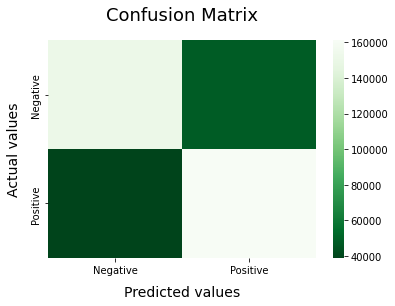

In [32]:
cf_matrix = confusion_matrix(y_test, preds_2)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
sns.heatmap(cf_matrix, cmap = 'Greens_r',fmt = '', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

#####**For Naive Bayes Model the Accuracy score is 0.77 and AUROC score is 0.85**

#####**For Logistic Regression Model the Accuracy score is 0.78 and AUROC score is 0.86**

####**So Both Naive Bayes Model and Logistic Regression Model almost gives the same score for this Classification Model on basis of Accuracy Score and AUROC Score.**